# Assignment-5

This notebook contains the questions to test the proficiency in `Mathematics for data science`.

### Date: 25th January, 2026

### Steps to solve and upload the assignment 

- Download the notebook in your local machine.
- Solve the coding questions in the notebook and save it.
- Rename the file as `Assignment-05-<your_name>_<your_surname>.ipynb`. For example if your name is Dipika Chopra then name the file as `Assignment-05-Dipika_Chopra.ipynb`.
- For numerical problems you can either solve the same using `LaTeX` in markdown cell of your soluton notebook or you can solve it on paper and upload the scan pdf copy of the solution.
- If you are solving it on paper then name the pdf file of the scan copy of the solution as `Assignment-05-<your_name>_<your_surname>.pdf`. For example if your name is Akash Kumar then name the file as `Assignment-05-Akash_Kumar.pdf`.
- Upload the solved notebook in your github repo under the folder **Assignment-5**.
- Upload the solved notebook and the scanned pdf copy of the solutions in the google drive location:https://drive.google.com/drive/folders/1aYVOo7Z-gIGbOR-XQsH33TwudtWfvMa4?usp=sharing
<h3><span style="color:red"> Deadline: 15th February, 2026 </span></h3>

<h5><span style="color:blue"> <b>Instructions:</b> Please answer all the questions. For problems requiring numerical solutions, you are encouraged to write code in Python to compute the results. Show your steps and explain your reasoning. </span></h5>

### Problem-1

In a network, data packets are sent through a shared channel. Suppose there are 10 devices attempting to send data. In any given time slot, each device has a 20% chance of attempting to send a packet, independently of other devices. A collision occurs if two or more devices attempt to send a packet in the same time slot. What is the probability that in a given time slot, there will be no collisions?

### Solution -1
Probability of sending data = 0.2.

Probability of not sending data = 0.8

collision won't occure if at given point of time zero device sends data or only one device sends data (atmost one device).

$P_A = probability of none of the device sends data

$P_B = probability of only one device sends data

$P_A = \binom{10}{0} * 0.2^0 * 0.8^{10} = 0.10737 $


$P_B = \binom{10}{1} * 0.2^1 * 0.8^9 = 0.26843 $


probability of no collision = $P_A + $P_B = 0.3758 $

There is 37% chance of no collision

In [1]:
import math

def calculate_no_collision_probability(total_device_count: int, 
                                       p_success: float, 
                                       collision_threshold:int):
    p_not_sending = 1 - p_success
    n = total_device_count
    p=0
    for k in range(0, collision_threshold):
        p += math.comb(n,k) * (p_success**k) * (p_not_sending**(n-k))
    return round(p*100,2)


In [2]:
total_server = 10
p_sending_packet = 0.2
collision_threshold = 2

calculate_no_collision_probability(total_server, p_sending_packet, collision_threshold)

37.58

### Problem-2

A system uses 8-character passwords. Each character can be any lowercase letter (a-z), uppercase letter (A-Z), or digit (0-9).
What is the probability that a randomly generated 8-character password contains at least one digit, given that character repetition is allowed?

#### Solution

There is 8 postions.

For each position we have 26+26+10 = 62 options to choose from.

Total possible passwords with letters &  digits = total sample space = $ 62^8 $

Total possible password without digit = $ 52^8 $

Probability of password having only letters = $ 52^8/62^8 = 0.244  $

Probability of password contains at lease one digit = 1 - 0.244 = 0.756



### Problem-3

A software project has two modules, A and B. The probability that module A has a bug is 0.15, and the probability that module B has a bug is 0.10. The probability that both modules have bugs is 0.03.

(a) What is the probability that module A has a bug, given that module B has a bug?

(b) What is the probability that module B has a bug, given that module A does not have a bug?

$P(A) = 0.15 $

$P(B) = 0.10 $

$P(A \cap B) = 0.03 $

(a) What is the probability that module A has a bug, given that module B has a bug?

$P(A | B) = P(A \cap B) / P(B) = 0.03/.0.10 = 0.3 $

(b) What is the probability that module B has a bug, given that module A does not have a bug?

$ P(B | A^c)  = P(B \cap A^c) / P(A^c) $

$P(B \cap A^c) = P(B) - P(A \cap B) = 0.10 - 0.03 = 0.07 $

$ P(B | A^c)  = P(B \cap A^c) / P(A^c) = 0.07 / (1 - P(A)) = 0.07 / 1- 0.15 = 0.082 $ 



In [21]:
def conditional_bug_probability(P_A, P_B, P_A_and_B):
    
    # probability of A given B (P(A | B))
    # P(A | B) = P(A \cap B) / P(B) 
    P_A_given_B = P_A_and_B / P_B

    # probability of B given A compliment (P(B | A compliment))
    P_B_and_not_A = P_B - P_A_and_B
    P_not_A = 1 - P_A

    P_B_given_not_A = P_B_and_not_A/P_not_A

    print(f"probability that module A has a bug, given that module B has a bug: {round(P_A_given_B,3)}")
    print(f"probability that module B has a bug, given that module A does not have a bug: {round(P_B_given_not_A,3)}")
    


In [22]:
P_A = 0.15
P_B = 0.10
P_A_and_B = 0.03
conditional_bug_probability(P_A, P_B, P_A_and_B)



probability that module A has a bug, given that module B has a bug: 0.3
probability that module B has a bug, given that module A does not have a bug: 0.082


### Problem-4

A robot uses a sensor to detect an obstacle. The sensor has a 95% chance of correctly detecting an obstacle when one is present (true positive rate). However, it also has a 2% chance of indicating an obstacle when there isn't one (false positive rate).
In the robot's environment, obstacles are present 10% of the time.

What is the probability that an obstacle is truly present, given that the sensor indicates an obstacle?

#### Solution
Probability of detecting the obstacle when there is one:
$P(+ | O) = .95 $

Probability of detecting the obstacle when there is None:
$P(+ | O^c) = 0.02 $

Probability of having an Obstacle:
$P(O) = 0.1 $


Probability that an obstacle truly present given it detects positive:

From Bayes Theorem:

$P(O | +) =  P(+ | O) * P(O) / (P(+ | O) * P(O)) + (P(+|O^c) * P(O^c)) $

$ = (0.95*0.1)/((0.95*0.1) + (0.02*0.9)) $

$ = 0.84 $

So if the sensor indicated positive then there is 84% chance that an obstacle is truely present


### Problem-5

A spam filter uses a keyword "money" to identify spam emails.
- 10% of all emails are spam.
- If an email is spam, the word "money" appears in it 80% of the time.
- If an email is not spam, the word "money" appears in it 5% of the time.

If an email contains the word "money", what is the probability that it is spam?

Probability of email is spam:
$P(S) = 0.10 $

Probability of having the word "money" if an email is spam:
$P(M | S) = 0.8 $

Probability of having the word "money" if an email is not spam:
$P(M | S^c) = 0.05 $

From bayes theorem:

$P(S | M ) = (P(M | S) * P (S)) / (P(M | S) * P(S) + P (M | S^c) * P(S^c) = (0.8 * 0.10)/(0.8*0.10 + 0.05 * 0.90) = 0.64 $

In [23]:
def check_spam_email(p_s, p_word_given_s, p_word_given_not_s):
    p_spam_given_word = (p_word_given_s * p_s) / (p_word_given_s * p_s + p_word_given_not_s * (1-p_s))
    return p_spam_given_word

In [28]:
P_S = 0.10
P_M_given_S = 0.8
P_M_not_S = 0.05

P_S_M = check_spam_email(P_S, P_M_given_S, P_M_not_S)
print(f"If an email contains the word 'money, the probability that it is spam: {round(P_S_M,3)}")


If an email contains the word 'money, the probability that it is spam: 0.64


### Problem-6

A rare disease affects 1 in 10,000 people. A diagnostic test for this disease has a 99% true positive rate (correctly identifies the disease when present) and a 0.5% false positive rate (incorrectly indicates the disease when not present).

If a randomly selected person tests positive for the disease, what is the probability that they actually have the disease?

In [42]:
def prob_disease_given_positive(disease_total_prob, true_positive_rate, false_positive_rate):
    numerator = true_positive_rate * disease_total_prob
    p_D_given_pos = numerator / (numerator + false_positive_rate * (1-disease_total_prob))
    
    return p_D_given_pos

In [44]:
#probability od disease
P_D = 1/10000
print(f"Probability of disease: {P_D}")

#Ture positive
P_pos_given_disease = 0.99

#False positive
P_pos_given_no_disease = 0.005

prob_D_given_pos = prob_disease_given_positive(P_D, P_pos_given_disease, P_pos_given_no_disease)
print(f"person tests positive for the disease, the probability that they actually have the disease: {round  (prob_D_given_pos,4)}")
print(f"It looks that though the result shows positive, but there is only {round(prob_D_given_pos*100,2)}% chance that person is having the disease")



Probability of disease: 0.0001
person tests positive for the disease, the probability that they actually have the disease: 0.0194
It looks that though the result shows positive, but there is only 1.94% chance that person is having the disease


### Problem-7

A batch of 500 microchips is produced. The probability that a single microchip is defective is 0.02.
Let X be the number of defective microchips in a random sample of 20 microchips from this batch. Assume the sample is taken with replacement, or the batch is large enough that we can model this as independent trials.

(a) What is the probability that exactly 3 microchips in the sample are defective?
(b) What is the probability that at least 2 microchips in the sample are defective?

Probability of single microchip is defective = 0.02

Probability of single microchip is not defective = 1 - 0.02 = 0.98

sample size = n = 20

$ P(X=3) = \binom{20}{3 }* 0.02^3 * 0.98^{17} = 1140 * 0.000008 * 0.70932177 \approx 0.0065  $

a) So there is 0.65% chance of exactly 3 microchips in the sample are defective

The probability of none of the chips are defective in the sample size of 20

$ P(X=0) = \binom{20}{0} *0.02^0 * 0.98^{20} = 0.6676 $

The probability of only one of the chip is defective in the sample size of 20

$ P(X=1) = \binom{20}{1} *0.02^1 * 0.98^{19} = 0.2724 $

Total Probablity of having maximum one defective chip = 0.6676 + 0.2724 =  0.94

(b) probability that at least 2 microchips in the sample are defective = P(X &geq; 2) =  1- 0.94 = 0.06

### Problem-8

The time (in hours) until a critical server component fails follows an exponential distribution with a mean of 500 hours.

(a) What is the probability that the component will last between 400 and 600 hours?

(b) The component has already been running for 300 hours without failure. What is the probability that it will last for at least another 250 hours?

#### Solution

(a) What is the probability that the component will last between 400 and 600 hours?

As it follows exponential distribution, so mean = E[X] = $ 1/ \lambda $

here mean= E[X] = 500

$1/ \lambda = 500 $

$\lambda = 1/500 $

$PDF = \lambda e^{- \lambda x} $ (x &geq; 0 ) 

Probability between 400 and 600  = $ P(400 &leq; X &leq; 600 )

= $ \int_{400}^{600} \lambda e^{-\lambda x} dx $

= $ - e^{- \lambda x } \Big|_{400}^{600}    $

= $ -[e^{- \frac{600}{500}} - e^{- \frac{400}{500}}] $

= - (-0.148)

=0.148

(b) The component has already been running for 300 hours without failure. What is the probability that it will last for at least another 250 hours?

From Memoryless property of exponential distribution, we know that the time already passed does not change the probability
P(X>s+t | X>s) = P(X>t)



Probability that it will last for at least another 250 hours after 300 hours  = $ P(X > 250 )

= $ \int_{250}^{\infty} \lambda e^{-\lambda x} dx $

= $ - e^{- \lambda x } \Big|_{250}^{\infty}    $

= $ -[e^{- \infty} - e^{- \frac{250}{500}}] $

= - (-0.6065)

=0.6065

In [8]:
import math

math.exp(-55/50) - math.exp(-3/5)
math.exp(-math.inf) - math.exp(-.5)

-0.6065306597126334

### Problem-9

The noise in a sensor's reading can be modeled by a Gaussian (Normal) distribution with a mean of 0 (bias) and a standard deviation of 0.5 units.

(a) What is the probability that a sensor reading's noise is between -0.2 and 0.3 units?

(b) If a reading is considered an "outlier" if its noise is more than 1.5 standard deviations away from the mean, what is the probability that a random reading is an outlier?

#### Solution 

$ mean = \mu = 0 $

standard deviation =  $ \sigma = 0.5 $

For Gaussian distribution:

PDF = $ \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2} $

In [43]:
import math

def normal_dist_function(x, sigma, mu):
    return (1/(sigma* math.sqrt(2*math.pi))) * math.exp(-0.5 * ((x-mu)/sigma) ** 2)

In [45]:
from scipy.integrate import quad

sigma = 0.5
mu = 0

result, error = quad(normal_dist_function, -0.2, 0.3, args=(sigma, mu))

print(f" (a) What is the probability that a sensor reading's noise is between -0.2 and 0.3 units?: {round(result,4)}")


 (a) What is the probability that a sensor reading's noise is between -0.2 and 0.3 units?: 0.3812



#### (b) If a reading is considered an "outlier" if its noise is more than 1.5 standard deviations away from the mean, what is the probability that a random reading is an outlier?

As a reading is considered an "outlier" if its noise is more than 1.5 standard deviations, so the outlier condition is : 

0.75 &lt; X &lt; -0.75

We need to find out out PDF of -0.75 &lt; X &lt; 0.75   

So outlier probability would be 1 - PDF

In [49]:
from scipy.integrate import quad

sigma = 0.5
mu = 0

result, error = quad(normal_dist_function, -0.75, 0.75, args=(sigma, mu))

print(f"the probability that a random reading is in between -0.75 and 0.75?: {round(result,4)}")
print(f"the probability that a random reading is an outlier?: {round((1- result),4)}")


the probability that a random reading is in between -0.75 and 0.75?: 0.8664
the probability that a random reading is an outlier?: 0.1336


### Problem-10

The latency (delay) in a specific network segment is observed to be normally distributed with a mean of 150 ms and a standard deviation of 20 ms.

(a) What is the probability that a data packet experiences a latency greater than 180 ms?

(b) Due to new QoS (Quality of Service) requirements, 90% of packets must arrive within a certain latency threshold. What is this threshold (in ms)?

(c) If a network engineer defines "critical latency" as any latency exceeding 2.5 standard deviations above the mean, what is the probability that a packet experiences critical latency?

#### (a) What is the probability that a data packet experiences a latency greater than 180 ms?

For Normal distribution:

PDF = $ \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2} $

In [75]:
from scipy.integrate import quad
import math

from scipy.stats import norm

def normal_dist_function(x, sigma, mu):
    return (1/(sigma* math.sqrt(2*math.pi))) * math.exp(-0.5 * ((x-mu)/sigma) ** 2)


mean = 150
std = 20

#P(X>180)
result, error = quad(normal_dist_function, 180, math.inf, args=(std, mean))
print(f"The probability that a data packet experiences a latency greater than 180 ms: {round(result,4)}")

# using cdf
print(f"The probability that a data packet experiences a latency greater than 180 ms: {round(1- norm.cdf(180, loc = 150, scale = 20), 4)}")


The probability that a data packet experiences a latency greater than 180 ms: 0.0668
The probability that a data packet experiences a latency greater than 180 ms: 0.0668


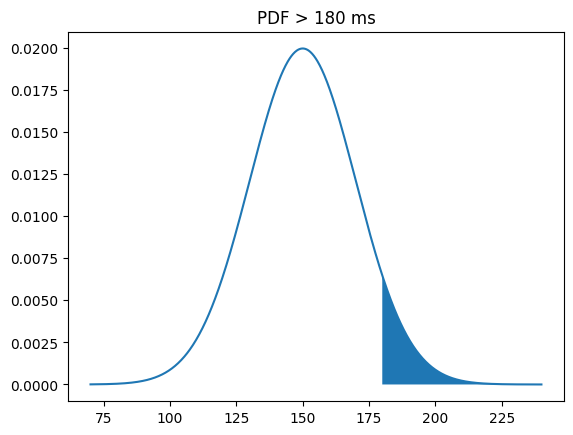

Area of non shaded section = 0.0668
So, the probability that a data packet experiences a latency greater than 180 ms 0.0668


In [47]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

x = np.linspace(70, 240, 1000)
pdf = norm.pdf(x, loc=150, scale = 20)


plt.title("PDF > 180 ms")
plt.plot(x, pdf, label = "PDF")

x_fill = np.linspace(180, 240, 1000)
plt.fill_between(x_fill, norm.pdf(x_fill, mu, sigma))

plt.show()

p_less_than_180 = round(1 - quad(normal_dist_function, -math.inf, 180, args=(std, mean))[0],4)
print(f"Area of non shaded section = {p_less_than_180}")
print(f"So, the probability that a data packet experiences a latency greater than 180 ms {p_less_than_180}")


#### (b) Due to new QoS (Quality of Service) requirements, 90% of packets must arrive within a certain latency threshold. What is this threshold (in ms)?

To Fulfill the condition "90% of packets must arrive within a certain latency threshold.", 
mean = 150, sigma = 20


$ \int_{-\infty}^{x} \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2} dx = 0.9 $

$ = \int_{-\infty}^{x} \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2} dx - 0.9 = 0 $

We can solve this equation or can use norm.ppf which is inverse of CDF to find the x value.

ppf(p, loc, scale): Computes the percent point function (inverse of the CDF), which returns the value x for a given cumulative probability p

p: The cumulative probability (a value between 0 and 1, representing the area under the probability density curve to the left of the desired point).

loc: The mean (\(\mu \)) of the normal distribution. The default is 0 (standard normal distribution). 

scale: The standard deviation (\(\sigma \)) of the normal distribution. The default is 1 (standard normal distribution). 


In [17]:
from scipy.stats import norm

mean = 150
std = 20

"""
ppf(p, loc, scale): Computes the percent point function (inverse of the CDF), 
which returns the value x for a given cumulative probability p
"""

ppf = norm.ppf(0.90, loc=mean, scale=std)
print(f" The latency threshold that 90% packets will be arrived is: {round(ppf, 2)}")

 The latency threshold that 90% packets will be arrived is: 175.63


#### (c) If a network engineer defines "critical latency" as any latency exceeding 2.5 standard deviations above the mean, what is the probability that a packet experiences critical latency?

In [2]:
from scipy.integrate import quad
import math


def normal_dist_function(x, sigma, mu):
    return (1/(sigma* math.sqrt(2*math.pi))) * math.exp(-0.5 * ((x-mu)/sigma) ** 2)


mean = 150
std = 20

# critical latency P(X > mean + 2.5* std)

critical_latency_threshold = mean + 2.5 * std
upper_bound = math.inf

#P(X>180)
result, error = quad(normal_dist_function, critical_latency_threshold, upper_bound, args=(std, mean))
print("The probability that a data packet experiences a latency if 'critical latency is defined as any latency exceeding 2.5 std above the mean:")
print(f"{round(result,4)}")

The probability that a data packet experiences a latency if 'critical latency is defined as any latency exceeding 2.5 std above the mean:
0.0062


### Problem-11

The lifespan of a certain electronic component, due to manufacturing variations, is normally distributed with a mean of 2500 hours and a standard deviation of 300 hours.

(a) A customer requires components that last at least 2000 hours. What percentage of manufactured components meet this requirement?

(b) The manufacturer wants to provide a warranty such that only 1% of components fail before the warranty period ends. What should be the warranty period (in hours)?

(c) If a batch of 10,000 components is produced, how many components are expected to have a lifespan between 2200 and 2800 hours?

#### (a) A customer requires components that last at least 2000 hours. What percentage of manufactured components meet this requirement?

In [59]:
from scipy.integrate import quad
import math


def normal_dist_function(x, sigma, mu):
    return (1/(sigma* math.sqrt(2*math.pi))) * math.exp(-0.5 * ((x-mu)/sigma) ** 2)


mean = 2500
sigma = 300

#P >= 2000

result,error =quad(normal_dist_function, 2000, math.inf, args=(sigma, mean))
print("A customer requires components that last at least 2000 hours. What percentage of manufactured components meet this requirement?:")
print(f"{round(result *100, 2)}%")




A customer requires components that last at least 2000 hours. What percentage of manufactured components meet this requirement?:
95.22%


In [58]:
# alternatively calculate cdf and subtract it form 1

from scipy.stats import norm

cdf = norm.cdf(2000, loc=2500, scale=300)
print("A customer requires components that last at least 2000 hours. What percentage of manufactured components meet this requirement?:")
print(f"{round(1 - cdf, 4)}")


A customer requires components that last at least 2000 hours. What percentage of manufactured components meet this requirement?:
0.9522


#### (b) The manufacturer wants to provide a warranty such that only 1% of components fail before the warranty period ends. What should be the warranty period (in hours)?

As manufacturer wants to provide a warrenty so that only 1% of components fail before the warrenty period, so 99% of times component will not fail.
P(X < W ) = 0.01 (W is warrenty period)

In [ ]:
cumulative_probability = 0.01

ppf = norm.ppf(cumulative_probability, loc=2500, scale = 300)

print(f"The warrenty period should be {round(ppf)} hours.")


The warrenty period should be 1802 hours


#### (c) If a batch of 10,000 components is produced, how many components are expected to have a lifespan between 2200 and 2800 hours?

In [12]:
result,error =quad(normal_dist_function, 2200, 2800, args=(sigma, mean))
total_components = 10000
print(f"The probability that a component lasts between 2200 and 2800 hours: {round(result, 4)}")
print(f"If a batch of 10,000 components is produced, how many components are expected to have a lifespan between 2200 and 2800 hours?")
print(f"{round(result * total_components)}")


The probability that a component lasts between 2200 and 2800 hours: 0.6827
If a batch of 10,000 components is produced, how many components are expected to have a lifespan between 2200 and 2800 hours?
6827


### Problem-12
The probability density function (pdf) of the triangular distribution is characterized by three points as shown in the figure below.

<img src="https://upload.wikimedia.org/wikipedia/commons/4/45/Triangular_distribution_PMF.png" alt="triangular distribution" width="500"/>

(a) min value of the distribution,
(b) max value of the distribution, and
(c) mode of the distribution

Note: $a \leq c \leq b$

Create a class `TriangularDistribution` with attributes `min`, `max` and `mode`. You need to implement the following methods:

- `pdf(x)`: returns the value of the pdf at point $x$.
- `plot_pdf()`: plots the pdf in the range $[min , max]$
- `cdf(x)`: returns the value of the cdf at point $x$ ; which denotes $P(X \leq x)$
- `plot_cdf()`: plots the cdf in the range $[min , max]$
- `get_probability(x1, x2)`: returns the probability $P(x_1 \leq X \leq x_2)$, where $x_1 \lt x_2$.

Gracefully handle the possible errors and also the edge conditions when either $ a = c $ or $b = c$ in the distribution.

Test your implementation.

#### Solution

Triangular Distribution formula:

f(x)    =  $ \frac {2 (x- a)}{(b-a)(c-a)} $   for a &leq; x &lt; c  $ 

= $\frac {2}{b-a}    $               for x=c 

= $\frac {2(b-x)}{(b-a)(b-c)} $ for c &lt; x &leq; b

= 0 Otherwise
        


In [130]:
### Write your code here
from dataclasses import dataclass
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad


@dataclass
class TriangularDistribution:
    min: float
    max: float
    mode: float

    def __post_init__(self):
        if not isinstance(self.min, (float, int)):
            raise TypeError("Triangle min should be numeric")
        
        if not isinstance(self.max, (float, int)):
            raise TypeError("Triangle max should be numeric")
        
        if not isinstance(self.mode, (float, int)):
            raise TypeError("Triangle mode should be numeric")
        
        if self.min > self.max:
            raise ValueError("Min should be less than Max")
        
        if self.mode > self.max or self.mode <self.min:
            raise ValueError("mode should be between min and max")


    def pdf(self, x: float|int)-> float:
        if not isinstance(x, (float, int)):
            raise TypeError("Point x should be Numeric")
          
        a, b, c = self.min, self.max, self.mode

        if x < a or x > b:
            return 0.0
        
        if a == c:
            return (2*(b-x)) / (b-a)**2
        
        if b == c:
            return (2*(x-a)) / (b-a) **2

        if x >= a and x < c:
            return (2 * (x-a)) / ((b-a)*(c-a))
        elif x > c and x <= b:
            return (2 * (b-x)) / ((b-a)*(b-c))
        elif x == c:
            return 2/(b-a)

    

    def plot_pdf(self):
        x = np.linspace(self.min, self.max, 1000)
        y_pdf = list(map(self.pdf, x))

        plt.figure(figsize=(10,6))
        plt.plot(x, y_pdf, label = "X value vs. PDF")
        plt.xlabel("X")
        plt.ylabel("PDF")
        plt.title(f"PDF of Triangle with min: {self.min}, max: {self.max}")
        plt.grid()
        plt.show()


    def cdf(self, x: float | int) ->float:
        if not isinstance(x, (float, int)):
            raise TypeError("Point x should be numeric")
         
        a, b, c = self.min, self.max, self.mode
        

        if x <= a:
            return 0.0
        
        if x >= b:
            return 1.0
        
        if a == c:
            return 1 - ((b-x)**2) / ((b-a)**2)
        
        if b==c:
            return ((x-a)**2) / ((b-a)**2)
        
        if a < x <=c:
            return ((x-a)**2) / ((b-a)*(c-a))
        
        else:
            return 1 - (((b-x)**2) / ((b-a)*(b-c)))
        


    def plot_cdf(self):
        x= np.linspace(self.min-1, self.max+1, 1000)
        y_cdf = list(map(self.cdf, x))

        plt.figure(figsize=(10,6))
        plt.plot(x, y_cdf, label = "X value vs. CDF")
        plt.axvline(self.min, linestyle = "--", label = "Minimum", color = "red")
        plt.axvline(self.max, linestyle = "--", label = "Maximum", color="green")  
        plt.axvline(self.mode, linestyle = "--", label = "Mode", color="blue")  
        plt.xlabel("X")
        plt.ylabel("CDF")
        plt.title(f"CDF of Triangle with min: {self.min}, max: {self.max}")
        plt.legend(loc="upper left")
        plt.grid()
        plt.show()

    
    def get_probability(self, x1: float|int, x2: float|int)->float:
        if not isinstance(x1, (float, int)):
            raise TypeError("Point x should be Numeric")
         
        if not isinstance(x2, (float, int)):
            raise TypeError("Point x should be Numeric")

        if x1 > x2:
            raise ValueError(f"{x1} (lower bound) should be less than {x2}(upper bound")
        return self.cdf(x2) - self.cdf(x1) 



PDF of tringle: 0.125


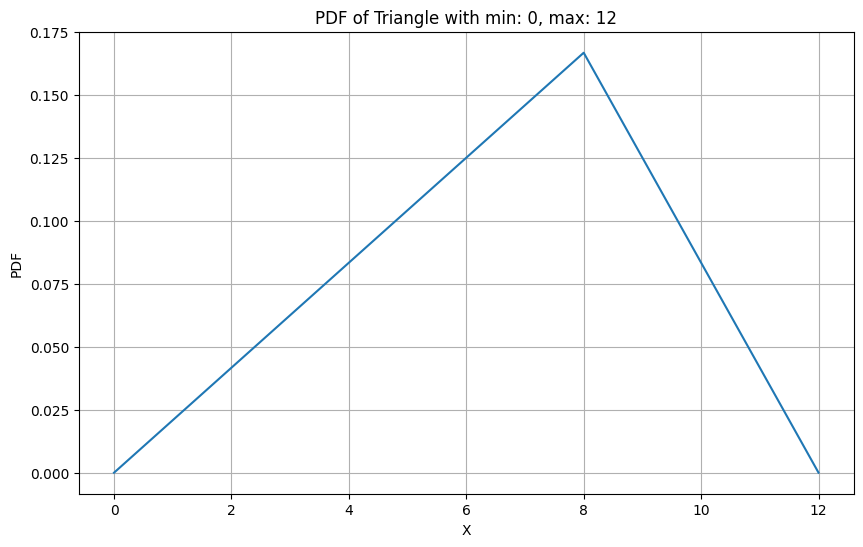

In [131]:
min = 0
max = 12
mode = 8

trd = TriangularDistribution(min, max, mode)
print(f"PDF of tringle: {round(trd.pdf(6), 4)}")

trd.plot_pdf()


In [132]:
print(f"Triangle min: {trd.min}, max: {trd.max}, mode: {trd.mode}")
print(f"CDF of 8: {round(trd.cdf(8), 4)} ")
print(f"CDF of -1: {trd.cdf(-1)}")
print(f"CDF of 20: {trd.cdf(20)}")

Triangle min: 0, max: 12, mode: 8
CDF of 8: 0.6667 
CDF of -1: 0.0
CDF of 20: 1.0


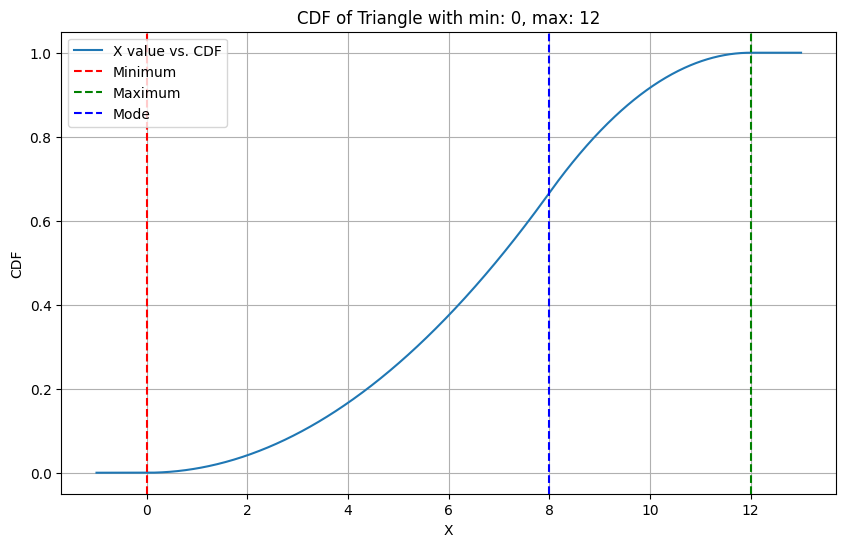

In [133]:
trd.plot_cdf()

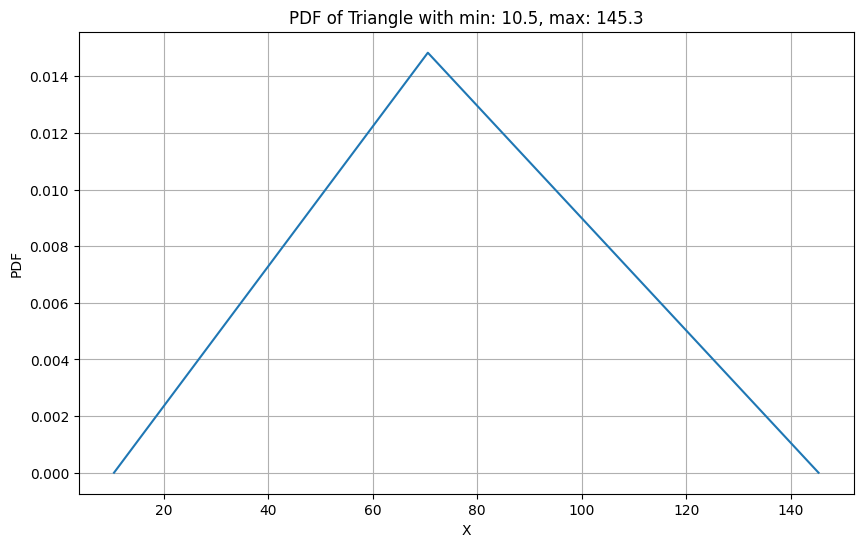

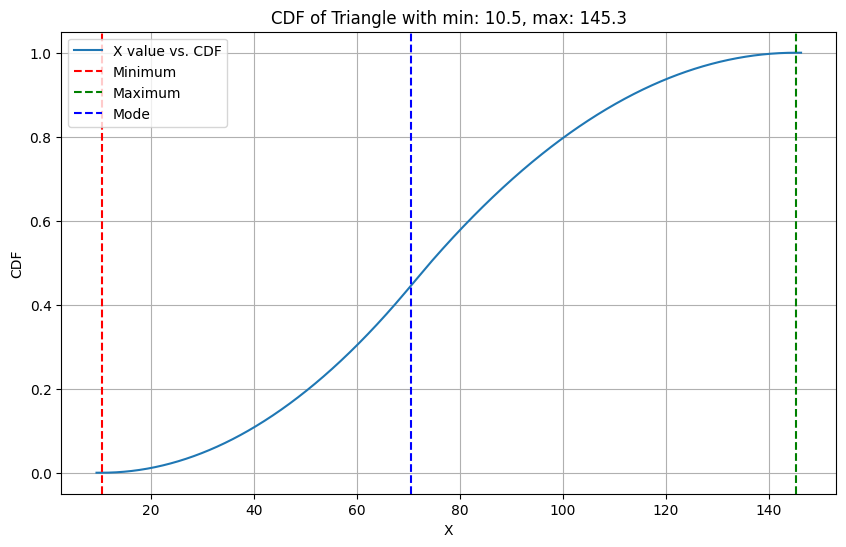

In [125]:
trd1 = TriangularDistribution(10.5, 145.3, 70.55)
trd1.plot_pdf()
trd1.plot_cdf()

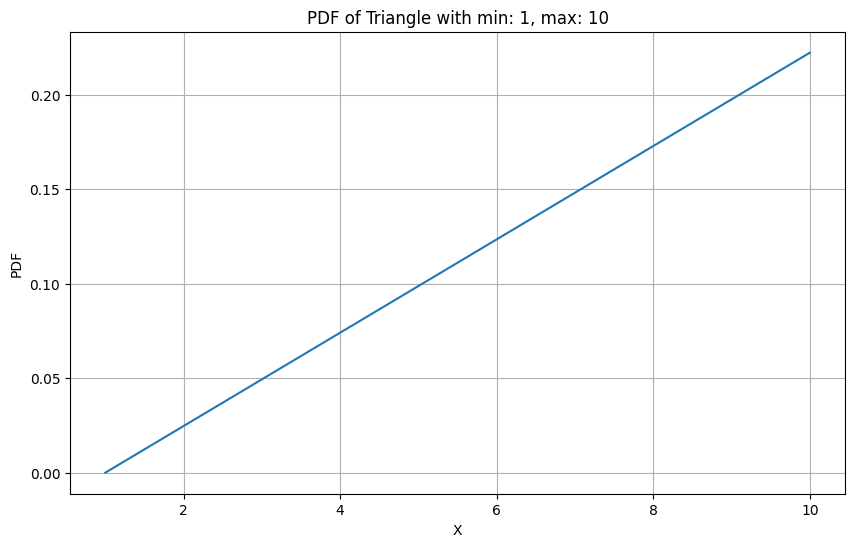

pdf: 0.12345679012345678
cdf: 0.30864197530864196


In [134]:
trd4 = TriangularDistribution(1, 10, 10)
trd4.plot_pdf()
print(f"pdf: {trd4.pdf(6)}")
print(f"cdf: {trd4.cdf(6)}")

In [127]:
try:
    trd2 = TriangularDistribution(1, .05, 0.5)
    trd2.plot_pdf
except TypeError as err:
    print(err)
except ValueError as verr:
    print(verr)

try:
    trd2 = TriangularDistribution("1", "10.55", "2.5")
    trd2.plot_pdf
except TypeError as err:
    print(err)
except ValueError as verr:
    print(verr)

Min should be less than Max
Triangle min should be numeric


### Problem-13

The `rand5()` function which returns a uniform random integer within the range [1, 5], is defined as following:

```python
def rand5():
    import numpy as np
    return np.random.randint(1,6)
```

Write a function `rand7()` that will generate a uniform random integer within the range [1, 7] by only using `rand5()`. 

Note: You can call `rand5()` as many time as you want inside the function `rand7()`, but you can not use `np.random.randint(1, 8)` or any other built-in methods in python. 

In [3]:
def rand5():
    import numpy as np
    return np.random.randint(1,6)

(array([1946., 1992., 2035., 2022., 2005.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

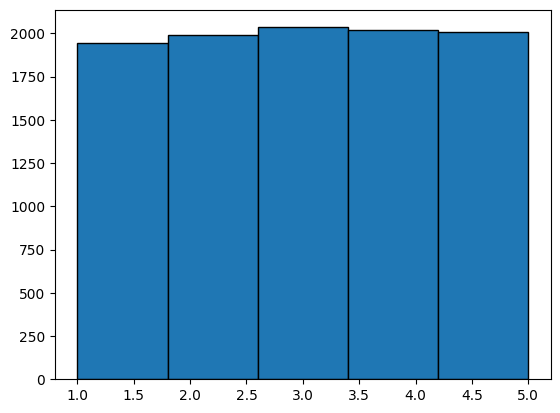

In [4]:
import matplotlib.pyplot as plt

x = [rand5() for _ in range(10000)]
plt.hist(x, bins = 5, edgecolor = "black")

In [6]:
### Write your code here
def rand7():
    while True:
        a = 5  *  rand5() - rand5()
        if a < 21:
            return (a % 7)+1


(array([1518., 1410., 1374., 1417., 1392., 1427., 1462.]),
 array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
        5.28571429, 6.14285714, 7.        ]),
 <BarContainer object of 7 artists>)

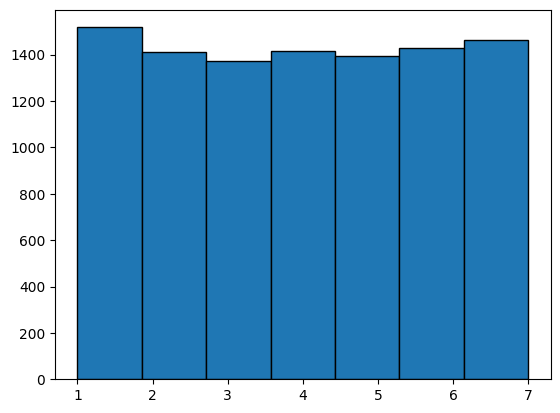

In [8]:
x = [rand7() for _ in range(10000)]
plt.hist(x, bins = 7, edgecolor = "black")

### Problem-14

A grayscale image can be represented as a matrix where the dimensions are (height, width). 
Let's consider a simplified scenario with two grayscale images, $A$ and $B$, both represented as 10×10 matrices where each element represents pixel intensity. Pixel intensity is an integer in the range [0-255].

You want to create a blended image $C$ by combining $A$ and $B$ such that $C=w_1 A+w_2 B$. This represents a weighted average blend.
Note that each element in the resultant matrix $C$ should also fall within the range [0, 255]. 

write the code of the function `blend_images(image_A, image_B, weight_A, weight_B)` that takes two matrices and two scalar weights and produces another matrix as an output by performing the above operation.

In [50]:
### Write your code here
import numpy as np

def blend_images(image_A: np.matrix, image_B: np.matrix, weight_A: int|float, weight_B: int|float):
    if not isinstance(image_A, np.matrix) or not isinstance(image_B, np.matrix) :
        raise TypeError("Both image_A and image_B should be in matrix form")
    
    if image_A.shape != image_B.shape:
        raise ValueError("Shape of image A and Image B should be same.")
    
    if not isinstance(weight_A, (float, int)) or not isinstance(weight_B, (float, int)):
        raise TypeError("Weight should be numeric")
    
    if weight_A < 0.0 or weight_B < 0.0:
        raise ValueError("Weights should be non negative")

    image_A_weighted = weight_A * image_A
    image_B_weighted = weight_B * image_B

    result = image_A_weighted + image_B_weighted
    C = np.clip(result, 0, 255).astype(np.uint8)
    
    return C


Matrix A:
[[ 61 216  57  83 149 219 231 227  32  90]
 [ 30 124 117 190  54 166  50 165  54 119]
 [189  55 161  89  29  28  89 142 126 134]
 [ 11 158  90 198 102  41  39  72 205 202]
 [ 35 146 209 112  83 217 104  15  35  26]
 [ 39   1  36  20   9 111 152  17 168 131]
 [172 204 229  44 134 166 124 244 227 121]
 [ 83 211 195 221 126  88 137  46 114  24]
 [218 135  32 169  20 133 151  22 132  18]
 [ 67  30 167  42 144  11  78  15  11 250]]

Matrix B:
[[218   7 216 125 158 209 253 124 224 129]
 [148 194 219 199  28 130   6  72  61 204]
 [113 217 146 212  82   0 131  66 252 231]
 [165 116  14 147 168 239 183  38  91  41]
 [248  30 149 179  66 100 238 250 146 235]
 [174  45 151 213  56  94 115 244 194  62]
 [121  41   5 187  88  93 146 185 106 216]
 [111  74 244 239  19 126 182 194 165 173]
 [200 230  78  65  42 232 107  10  13  13]
 [109  54 120 178  22 157  53 159 136 158]]

Output of blended image matrix:

[[139 111 136 104 153 214 242 175 128 109]
 [ 89 159 168 194  41 148  28 118  57 16

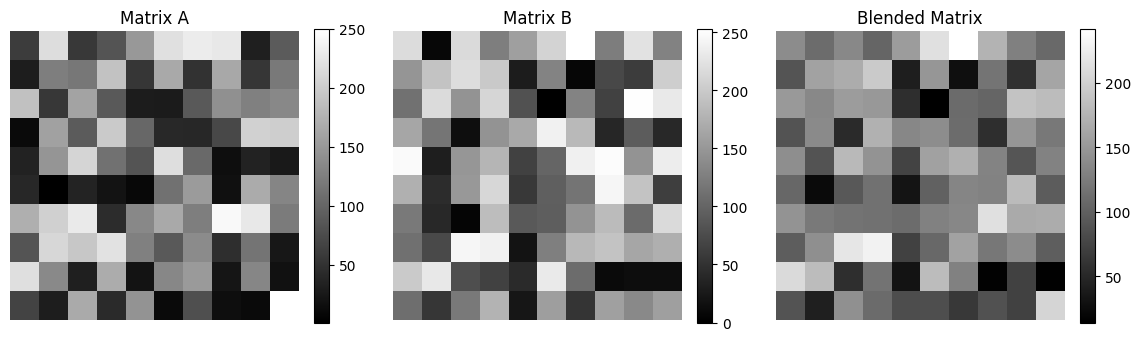

In [ ]:
import matplotlib.pyplot as plt


array_A = np.random.randint(0, 255, (10, 10), dtype=np.uint8)
array_B = np.random.randint(0, 255, (10, 10), dtype=np.uint8)

matrix_A = np.matrix(array_A)
matrix_B = np.matrix(array_B)

print("Matrix A:")
print(matrix_A)

print()
print("Matrix B:")
print(matrix_B)

print()
print("Output of blended image matrix:\n")
matrix_C = blend_images(matrix_A, matrix_B, 0.5, 0.5)

print(matrix_C)
    
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,8))

im1 = ax1.imshow(matrix_A, cmap='gray', interpolation='nearest')
ax1.set_title("Matrix A")
ax1.axis('off')
fig.colorbar(im1, ax=ax1, fraction = 0.046)

im2 = ax2.imshow(matrix_B, cmap='gray', interpolation='nearest')
ax2.set_title("Matrix B")
ax2.axis('off')
fig.colorbar(im2, ax=ax2, fraction = 0.046)

im3 = ax3.imshow(matrix_C, cmap='grey')
ax3.set_title("Blended Matrix")
ax3.axis('off')
fig.colorbar(im3, ax=ax3, fraction = 0.046)



### Problem-15

Calculate the eigen values and eigen vectors of the following matrices.

$A = \begin{bmatrix}
5 & 2 \\
2 & 2
\end{bmatrix}$      

$B = \begin{bmatrix}
1 & 1 & 0\\
0 & 2 & 0\\
-1 & 1 & 3
\end{bmatrix}$

In [40]:
import numpy as np

def calculate_eigen(mat_x: np.matrix):
    if not isinstance(mat_x, np.matrix):
        raise TypeError("Input should be a matrix")
    
    print(f"Input Matrix:\n {mat_x}\n")

    mat_x_shape = mat_x.shape[0]
    print(f"Shape of the matrix: {mat_x_shape}")


    eig_val_A, eig_vec_A = np.linalg.eig(mat_x)
    print(f"Eigen Value of matrix: {eig_val_A}\nEigen Vector: {eig_vec_A}\n")
  

    #Sort eigenvectors by eigenvalues.
    eig_val_args = eig_val_A.argsort()
    print(f"Separate corresponding eigen vector")
    for val in eig_val_args:
        print(f"eigen Value: {eig_val_A[val]}")
        print(f"eigen Vector: {eig_vec_A[:, val]}\n")
        
    
    print(f"\nTest for eigen value decomposition of the Matrix:")
    big_lambda = eig_val_A * np.identity(mat_x_shape)
    returned_matrix = (eig_vec_A * big_lambda * np.linalg.inv(eig_vec_A)).astype(int)
    print(f"Returned matrix after eigen value decomposition\n {returned_matrix}")
    
    print(f"Input Matrix == Decomposed Matrix?: {np.array_equal(mat_x, returned_matrix)}")




In [41]:
A = np.matrix([[5,2],[2,2]])
calculate_eigen(A)


Input Matrix:
 [[5 2]
 [2 2]]

Shape of the matrix: 2
Eigen Value of matrix: [6. 1.]
Eigen Vector: [[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]

Separate corresponding eigen vector
eigen Value: 1.0
eigen Vector: [[-0.4472136 ]
 [ 0.89442719]]

eigen Value: 6.0
eigen Vector: [[0.89442719]
 [0.4472136 ]]


Test for eigen value decomposition of the Matrix:
Returned matrix after eigen value decomposition
 [[5 2]
 [2 2]]
Input Matrix == Decomposed Matrix?: True


In [42]:
B = np.matrix([[1,1,0],[0,2,0],[-1,1,3]])
calculate_eigen(B)

Input Matrix:
 [[ 1  1  0]
 [ 0  2  0]
 [-1  1  3]]

Shape of the matrix: 3
Eigen Value of matrix: [3. 1. 2.]
Eigen Vector: [[0.         0.89442719 0.70710678]
 [0.         0.         0.70710678]
 [1.         0.4472136  0.        ]]

Separate corresponding eigen vector
eigen Value: 1.0
eigen Vector: [[0.89442719]
 [0.        ]
 [0.4472136 ]]

eigen Value: 2.0
eigen Vector: [[0.70710678]
 [0.70710678]
 [0.        ]]

eigen Value: 3.0
eigen Vector: [[0.]
 [0.]
 [1.]]


Test for eigen value decomposition of the Matrix:
Returned matrix after eigen value decomposition
 [[ 1  1  0]
 [ 0  2  0]
 [-1  1  3]]
Input Matrix == Decomposed Matrix?: True
